In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Jan 31 11:22:00 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers, models
import numpy as np
from sklearn.model_selection import train_test_split
from glob import glob
import os
from tqdm import tqdm
from datetime import datetime
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = np.load('/content/drive/MyDrive/인턴/data_white/data_white/00000.npz') // **write your path**

FileNotFoundError: ignored

In [ ]:
data['inputs'].shape

(800, 15, 15)

In [ ]:
print(data['inputs'][0])

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [ ]:
print(data['outputs'][0])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
print(data['inputs'][8])

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [ ]:
print(data['outputs'][8])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
for i in range(16,24,1):
  print(data['inputs'][i])
  print("\n")

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  1  0  0  0  0  0  0]
 [ 0  0  0  0 -1  0  0 -1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 -1  0  0  0  0  0

In [ ]:
w, h = 15, 15
base_path = os.path.join('/content/drive/MyDrive/인턴/data_white_big', '*/*.npz')

file_list = glob(base_path)

x_data, y_data = [], []
for file_path in tqdm(file_list):
    data = np.load(file_path)
    x_data.extend(data['inputs'])
    y_data.extend(data['outputs'])

x_data = np.array(x_data, np.float32).reshape((-1, h, w, 1))
y_data = np.array(y_data, np.float32).reshape((-1, h * w))

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2)

del x_data, y_data

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

100%|██████████| 11100/11100 [02:30<00:00, 73.79it/s] 


(1758067, 15, 15, 1) (1758067, 225)
(439517, 15, 15, 1) (439517, 225)


In [ ]:
model = models.Sequential([
    layers.Conv2D(64, 7, activation='relu',  padding='same', input_shape=(h, w, 1)),
        layers.Dropout(0.2),
    layers.Conv2D(128, 7, activation='relu', padding='same'),
        layers.Dropout(0.2),
    layers.Conv2D(256, 7, activation='relu', padding='same'),
        layers.Dropout(0.2),
    layers.Conv2D(128, 7, activation='relu', padding='same'),
        layers.Dropout(0.2),
    layers.Conv2D(64, 7, activation='relu', padding='same'),
        layers.Dropout(0.2),
    layers.Conv2D(1, 1, activation=None, padding='same'),
    layers.Reshape((h * w,)),
    layers.Activation('sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['acc']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 15, 15, 64)        3200      
                                                                 
 dropout_5 (Dropout)         (None, 15, 15, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 15, 15, 128)       401536    
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 128)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 15, 15, 256)       1605888   
                                                                 
 dropout_7 (Dropout)         (None, 15, 15, 256)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 15, 15, 128)      

- kernel 7,5,3,3,3: 53.3
- kernel all 7: 56.12
- kernel all 7, double kernel:

In [ ]:
start_time = datetime.now().strftime('%Y%m%d_%H%M%S')
os.makedirs('models', exist_ok=True)

history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=256,
    epochs=10,
    callbacks=[
        ModelCheckpoint('./models/%s.h5' % (start_time), monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, mode='auto')
    ],
    validation_data=(x_val, y_val),
    use_multiprocessing=True,
    workers=16
)

Epoch 1/10
6868/6868 [==============================] - ETA: 0s - loss: 0.0163 - acc: 0.3336
Epoch 00001: val_acc improved from -inf to 0.46279, saving model to ./models/20220131_114331.h5
6868/6868 [==============================] - 479s 68ms/step - loss: 0.0163 - acc: 0.3336 - val_loss: 0.0123 - val_acc: 0.4628 - lr: 0.0010
Epoch 2/10
6867/6868 [============================>.] - ETA: 0s - loss: 0.0127 - acc: 0.4503
Epoch 00002: val_acc improved from 0.46279 to 0.49986, saving model to ./models/20220131_114331.h5
6868/6868 [==============================] - 467s 68ms/step - loss: 0.0127 - acc: 0.4503 - val_loss: 0.0114 - val_acc: 0.4999 - lr: 0.0010
Epoch 3/10
6867/6868 [============================>.] - ETA: 0s - loss: 0.0119 - acc: 0.4742
Epoch 00003: val_acc improved from 0.49986 to 0.51529, saving model to ./models/20220131_114331.h5
6868/6868 [==============================] - 467s 68ms/step - loss: 0.0119 - acc: 0.4742 - val_loss: 0.0110 - val_acc: 0.5153 - lr: 0.0010
Epoch 4/10

In [ ]:
filters,biases = model.layers[0].get_weights()

In [ ]:
print(filters.shape)

(7, 7, 1, 64)


In [ ]:
import matplotlib.pyplot as plt

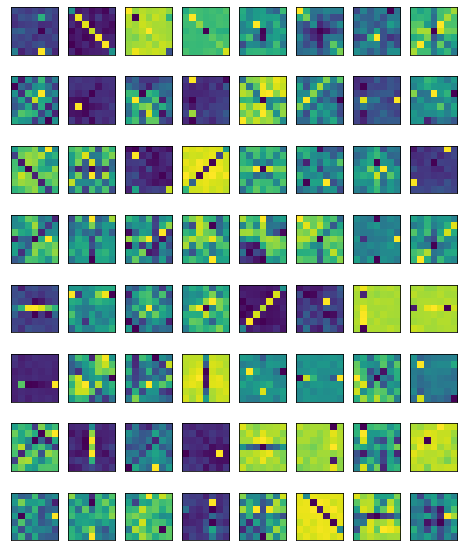

In [ ]:
fig1=plt.figure(figsize=(8,10))
c=8
r=8
n=64

for i in range(n):
  f = filters[:,:,:,i]
  fig1 = plt.subplot(r,c,i+1)
  fig1.set_xticks([])
  fig1.set_yticks([])
  plt.imshow(f[:,:,0])
plt.show()


In [ ]:
filters,biases = model.layers[2].get_weights()

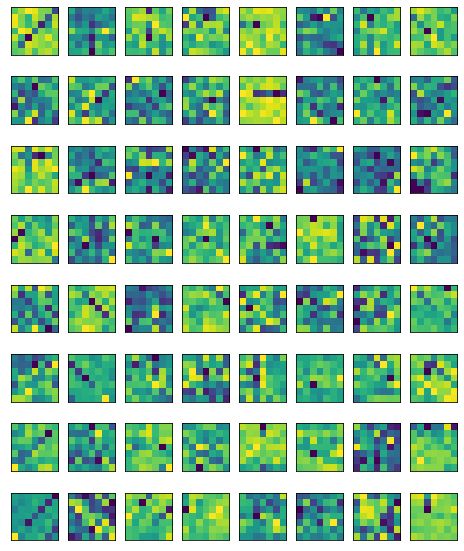

In [ ]:
fig1=plt.figure(figsize=(8,10))
c=8
r=8
n=64

for i in range(n):
  f = filters[:,:,:,i]
  fig1 = plt.subplot(r,c,i+1)
  fig1.set_xticks([])
  fig1.set_yticks([])
  plt.imshow(f[:,:,0])
plt.show()

In [ ]:
filters,biases = model.layers[4].get_weights()

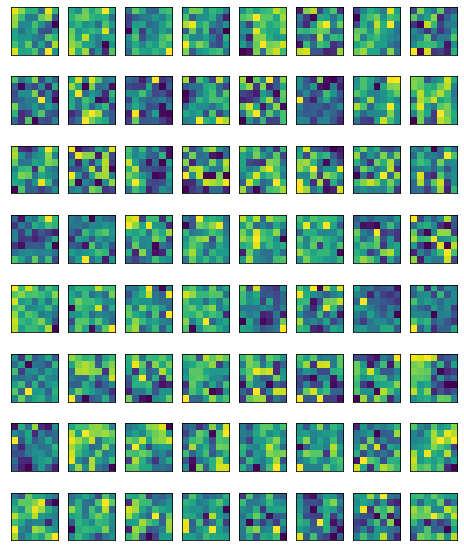

In [ ]:
fig1=plt.figure(figsize=(8,10))
c=8
r=8
n=64

for i in range(n):
  f = filters[:,:,:,i]
  fig1 = plt.subplot(r,c,i+1)
  fig1.set_xticks([])
  fig1.set_yticks([])
  plt.imshow(f[:,:,0])
plt.show()

In [ ]:
filters,biases = model.layers[6].get_weights()

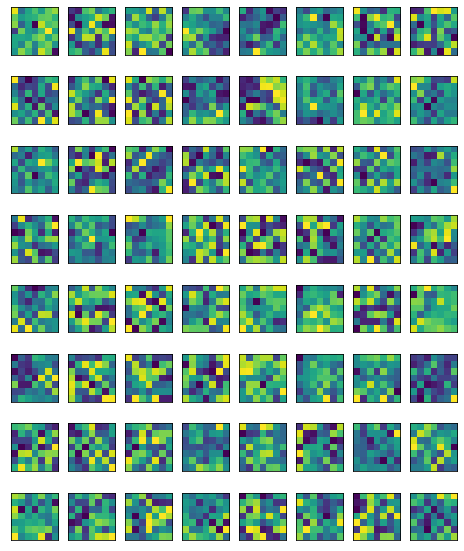

In [ ]:
fig1=plt.figure(figsize=(8,10))
c=8
r=8
n=64

for i in range(n):
  f = filters[:,:,:,i]
  fig1 = plt.subplot(r,c,i+1)
  fig1.set_xticks([])
  fig1.set_yticks([])
  plt.imshow(f[:,:,0])
plt.show()

In [ ]:
filters,biases = model.layers[8].get_weights()

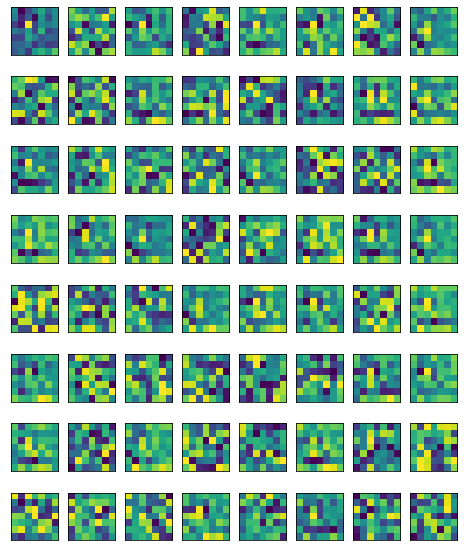

In [ ]:
fig1=plt.figure(figsize=(8,10))
c=8
r=8
n=64

for i in range(n):
  f = filters[:,:,:,i]
  fig1 = plt.subplot(r,c,i+1)
  fig1.set_xticks([])
  fig1.set_yticks([])
  plt.imshow(f[:,:,0])
plt.show()

In [ ]:
i = 0

for y in range(h):
    for x in range(w):
        print('%2d' % x_val[i][y, x], end='')
    print()

 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0-1-1 1-1 0 0 0 0 0
 0 0 0 0 0-1 1 1 1 1-1 0 0 0 0
 0 0 0 0 1-1 1 1-1-1-1-1 1 0 0
 0 0 0 0 0-1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1-1 0 0 0 0 0 0 0 0
 0 0 0 0-1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


In [ ]:
y_pred = model.predict(np.expand_dims(x_val[i], axis=0)).squeeze()
y_pred = y_pred.reshape((h, w))

y, x = np.unravel_index(np.argmax(y_pred), y_pred.shape)

print(x, y, y_pred[y, x])

5 7 0.9266282


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
print(acc)
print(val_acc)
print(loss)
print(val_loss)

[0.333553284406662, 0.45030876994132996, 0.4742452800273895, 0.4865844249725342, 0.49439525604248047, 0.5002073049545288, 0.5046946406364441, 0.5083105564117432, 0.5120424628257751, 0.515377402305603]
[0.4627898335456848, 0.4998578131198883, 0.5152906775474548, 0.5234541296958923, 0.5281957387924194, 0.5309601426124573, 0.5343137979507446, 0.5374832153320312, 0.5396537780761719, 0.5418243408203125]
[0.016273874789476395, 0.012656268663704395, 0.011949189938604832, 0.011591332964599133, 0.011357882060110569, 0.01119711622595787, 0.011065227910876274, 0.010953878052532673, 0.010864868760108948, 0.010698518715798855]
[0.012252511456608772, 0.011386914178729057, 0.011015570722520351, 0.010870116762816906, 0.010832400061190128, 0.01027586404234171, 0.010210198350250721, 0.010803507640957832, 0.010174262337386608, 0.009830384515225887]


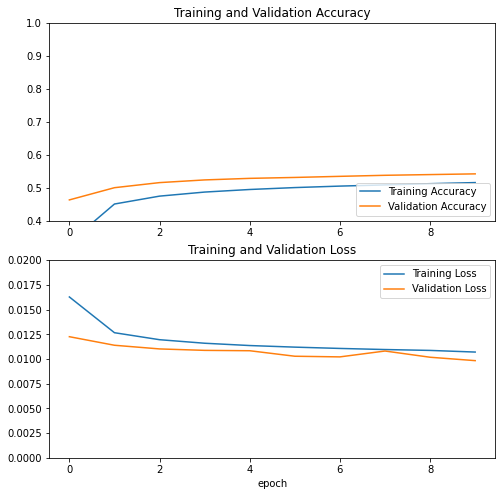

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.4, 1])

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 0.02])

plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()